In [1]:
import pandas as pd #data manipulation
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [456]:
df = pd.read_csv('Nashville_housing_data_2013_2016.csv',)
df=df.drop(['Unnamed: 0','Unnamed: 0.1','Suite/ Condo   #','Owner Name','Address','City','State','Legal Reference'], axis = 1)

In [457]:
#Part 1: Use proper data cleansing techniques to ensure that you have the highest quality data to model this problem. Detail your process and discuss the decisions you made to clean the data.

df


,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
0,105 03 0D 008.00,RESIDENTIAL CONDO,1208 3RD AVE S,NASHVILLE,2013-01-24,132000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,No,No,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,No,No,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,No,No,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56631,093 13 0B 274.00,RESIDENTIAL CONDO,320 11TH AVE S,NASHVILLE,2016-10-06,210000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56632,093 13 0D 044.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-25,338000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56633,093 13 0D 048.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-04,742000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56634,093 13 0D 056.00,RESIDENTIAL CONDO,700 12TH AVE S,NASHVILLE,2016-10-26,320000,No,No,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [458]:
nan_value = float("NaN")
df.replace("", nan_value, inplace=True)
df.dropna(subset = ["Property Address"], inplace=True)
df.dropna(subset = ["Property City"], inplace=True)
df.dropna(subset = ["Acreage",'Tax District','Finished Area','Foundation Type','Year Built','Bedrooms','Full Bath','Half Bath'], inplace=True)

In [459]:
df.isnull().sum()

Parcel ID                            0
Land Use                             0
Property Address                     0
Property City                        0
Sale Date                            0
Sale Price                           0
Sold As Vacant                       0
Multiple Parcels Involved in Sale    0
Acreage                              0
Tax District                         0
Neighborhood                         0
image                                0
Land Value                           0
Building Value                       0
Total Value                          0
Finished Area                        0
Foundation Type                      0
Year Built                           0
Exterior Wall                        0
Grade                                0
Bedrooms                             0
Full Bath                            0
Half Bath                            0
dtype: int64

In [1]:
df['Sale Price'].describe().apply(lambda x: format(x, 'f'))


NameError: name 'df' is not defined

In [461]:
up=df
up['Sale Price'][(up['Sale Price'] < up['Total Value'])] = 1
up['Sale Price'][(up['Sale Price'] >= up['Total Value'])] = 0


C:\Users\leube\AppData\Local\Temp\ipykernel_47828\112829285.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up['Sale Price'][(up['Sale Price'] < up['Total Value'])] = 1
C:\Users\leube\AppData\Local\Temp\ipykernel_47828\112829285.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  up['Sale Price'][(up['Sale Price'] >= up['Total Value'])] = 0


In [462]:
up 
print(up['Sale Price']) 

1        0
2        0
3        1
4        1
5        1
        ..
56605    0
56607    0
56614    0
56615    0
56616    0
Name: Sale Price, Length: 24011, dtype: int64


In [471]:
df1 = pd.read_csv('Nashville_housing_data_2013_2016.csv')
df1=df1.drop(['Unnamed: 0','Unnamed: 0.1','Suite/ Condo   #','Owner Name','Address','City','State','Legal Reference'], axis = 1)

In [472]:
nan_value = float("NaN")
df1.replace("", nan_value, inplace=True)
df1.dropna(subset = ["Property Address"], inplace=True)
df1.dropna(subset = ["Property City"], inplace=True)
df1.dropna(subset = ["Acreage",'Tax District','Finished Area','Foundation Type','Year Built','Bedrooms','Full Bath','Half Bath'], inplace=True)

In [473]:
df1

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,191500,No,No,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,202000,No,No,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,32000,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,102000,No,No,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,2013-01-04,93736,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,\134000\656001.JPG,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,ANTIOCH,2016-10-26,214000,No,No,0.27,URBAN SERVICES DISTRICT,6328.0,\199000\727001.JPG,25000.0,142400.0,167400.0,2421.00000,SLAB,1996.0,BRICK/FRAME,C,3.0,3.0,0.0
56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,ANTIOCH,2016-10-28,236000,No,No,0.23,URBAN SERVICES DISTRICT,6328.0,\200000\85001.JPG,25000.0,159300.0,184300.0,3117.00000,SLAB,1995.0,BRICK/FRAME,C,3.0,3.0,0.0
56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NASHVILLE,2016-10-28,466000,No,No,0.15,URBAN SERVICES DISTRICT,126.0,\66000\843001.JPG,40000.0,204100.0,256000.0,1637.00000,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0
56615,082 05 0 058.00,SINGLE FAMILY,1614 5TH AVE N,NASHVILLE,2016-10-26,685000,No,No,0.19,URBAN SERVICES DISTRICT,126.0,\66000\861001.JPG,40000.0,295900.0,351600.0,2478.00000,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0


In [474]:
op=df1
op['Sale Price'][(op['Sale Price'] <= op['Total Value'])] = 0
op['Sale Price'][(op['Sale Price'] > op['Total Value'])] = 1



C:\Users\leube\AppData\Local\Temp\ipykernel_47828\2865047833.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op['Sale Price'][(op['Sale Price'] <= op['Total Value'])] = 0
C:\Users\leube\AppData\Local\Temp\ipykernel_47828\2865047833.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  op['Sale Price'][(op['Sale Price'] > op['Total Value'])] = 1


In [475]:
op

,Parcel ID,Land Use,Property Address,Property City,Sale Date,Sale Price,Sold As Vacant,Multiple Parcels Involved in Sale,Acreage,Tax District,Neighborhood,image,Land Value,Building Value,Total Value,Finished Area,Foundation Type,Year Built,Exterior Wall,Grade,Bedrooms,Full Bath,Half Bath
1,105 11 0 080.00,SINGLE FAMILY,1802 STEWART PL,NASHVILLE,2013-01-11,1,No,No,0.17,URBAN SERVICES DISTRICT,3127.0,\114000\910001.JPG,32000.0,134400.0,168300.0,1149.00000,PT BSMT,1941.0,BRICK,C,2.0,1.0,0.0
2,118 03 0 130.00,SINGLE FAMILY,2761 ROSEDALE PL,NASHVILLE,2013-01-18,1,No,No,0.11,CITY OF BERRY HILL,9126.0,\131000\191001.JPG,34000.0,157800.0,191800.0,2090.82495,SLAB,2000.0,BRICK/FRAME,C,3.0,2.0,1.0
3,119 01 0 479.00,SINGLE FAMILY,224 PEACHTREE ST,NASHVILLE,2013-01-18,0,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,\133000\721001.JPG,25000.0,243700.0,268700.0,2145.60001,FULL BSMT,1948.0,BRICK/FRAME,B,4.0,2.0,0.0
4,119 05 0 186.00,SINGLE FAMILY,316 LUTIE ST,NASHVILLE,2013-01-23,0,No,No,0.34,URBAN SERVICES DISTRICT,3130.0,\134000\474001.JPG,25000.0,138100.0,164800.0,1969.00000,CRAWL,1910.0,FRAME,C,2.0,1.0,0.0
5,119 05 0 387.00,SINGLE FAMILY,2626 FOSTER AVE,NASHVILLE,2013-01-04,0,No,No,0.17,URBAN SERVICES DISTRICT,3130.0,\134000\656001.JPG,25000.0,86100.0,113300.0,1037.00000,CRAWL,1945.0,FRAME,C,2.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56605,176 05 0 070.00,SINGLE FAMILY,5004 SUNSHINE DR,ANTIOCH,2016-10-26,1,No,No,0.27,URBAN SERVICES DISTRICT,6328.0,\199000\727001.JPG,25000.0,142400.0,167400.0,2421.00000,SLAB,1996.0,BRICK/FRAME,C,3.0,3.0,0.0
56607,176 09 0 003.00,SINGLE FAMILY,4964 HICKORY WOODS E,ANTIOCH,2016-10-28,1,No,No,0.23,URBAN SERVICES DISTRICT,6328.0,\200000\85001.JPG,25000.0,159300.0,184300.0,3117.00000,SLAB,1995.0,BRICK/FRAME,C,3.0,3.0,0.0
56614,082 05 0 040.00,SINGLE FAMILY,1625 5TH AVE N,NASHVILLE,2016-10-28,1,No,No,0.15,URBAN SERVICES DISTRICT,126.0,\66000\843001.JPG,40000.0,204100.0,256000.0,1637.00000,CRAWL,2004.0,FRAME,B,3.0,2.0,1.0
56615,082 05 0 058.00,SINGLE FAMILY,1614 5TH AVE N,NASHVILLE,2016-10-26,1,No,No,0.19,URBAN SERVICES DISTRICT,126.0,\66000\861001.JPG,40000.0,295900.0,351600.0,2478.00000,CRAWL,2005.0,FRAME,B,4.0,3.0,1.0


In [476]:
op.drop(['image','Sale Date','Parcel ID','Property Address','Neighborhood'],axis=1,inplace=True)
up.drop(['image','Sale Date','Parcel ID','Property Address','Neighborhood'],axis=1,inplace=True)
op

KeyError: "['image', 'Sale Date', 'Parcel ID', 'Property Address', 'Neighborhood'] not found in axis"

In [477]:
from sklearn.preprocessing import OrdinalEncoder
ord_enc = OrdinalEncoder()
op["Grade"]= ord_enc.fit_transform(op[["Grade","Tax District","Foundation Type","Exterior Wall"]])
up["Grade"]= ord_enc.fit_transform(up[["Grade","Tax District","Foundation Type","Exterior Wall"]])
op["Tax District"] =ord_enc.fit_transform(op[["Tax District"]])
op["Foundation Type"] =ord_enc.fit_transform(op[["Foundation Type"]])
op["Exterior Wall"] =ord_enc.fit_transform(op[["Exterior Wall"]])
up["Tax District"] =ord_enc.fit_transform(up[["Tax District"]])
up["Foundation Type"] =ord_enc.fit_transform(up[["Foundation Type"]])
up["Exterior Wall"] =ord_enc.fit_transform(up[["Exterior Wall"]])
up["Land Use"] =ord_enc.fit_transform(up[["Land Use"]])
up["Property City"] =ord_enc.fit_transform(up[["Property City"]])
up["Sold As Vacant"] =ord_enc.fit_transform(up[["Sold As Vacant"]])
up["Multiple Parcels Involved in Sale"] =ord_enc.fit_transform(up[["Multiple Parcels Involved in Sale"]])
op["Land Use"] =ord_enc.fit_transform(op[["Land Use"]])
op["Property City"] =ord_enc.fit_transform(op[["Property City"]])
op["Sold As Vacant"] =ord_enc.fit_transform(op[["Sold As Vacant"]])
op["Multiple Parcels Involved in Sale"] =ord_enc.fit_transform(op[["Multiple Parcels Involved in Sale"]])
op["Property City"]

1        7.0
2        7.0
3        7.0
4        7.0
5        7.0
        ... 
56605    0.0
56607    0.0
56614    7.0
56615    7.0
56616    7.0
Name: Property City, Length: 24011, dtype: float64

In [347]:

up=pd.get_dummies(up, columns=['Land Use'], drop_first=True)
op=pd.get_dummies(op, columns=['Land Use'], drop_first=True)

In [ ]:
#Part 2:

#Build a logistic regression model to accurately identify overpricing/underpricing and determine what is driving those prices.

In [478]:
x_train['Tax District']

25004    6.0
3821     6.0
15319    6.0
11842    5.0
5697     4.0
        ... 
10676    5.0
37729    6.0
17076    6.0
11005    5.0
38062    6.0
Name: Tax District, Length: 19208, dtype: float64

In [481]:
y_logr=up[['Sale Price']]
x_logr=up.drop(['Sale Price','Multiple Parcels Involved in Sale','Sold As Vacant','Land Use'],axis=1)
x_train, x_test, z_train, z_test = train_test_split(x_logr, y_logr, test_size=0.20)

import statsmodels.api as sm

Xlog2 = sm.add_constant(x_train) 
logr_model = sm.Logit(z_train, Xlog2) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.556605
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Sale Price   No. Observations:                19208
Model:                          Logit   Df Residuals:                    19193
Method:                           MLE   Df Model:                           14
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                 0.02166
Time:                        06:18:43   Log-Likelihood:                -10691.
converged:                       True   LL-Null:                       -10928.
Covariance Type:            nonrobust   LLR p-value:                 3.915e-92
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const              -6.6403      1.427     -4.655      0.000      -9.436      -3.844
Property City 

In [482]:
y_log=op[['Sale Price']]
x_log=op.drop(['Sale Price','Multiple Parcels Involved in Sale','Sold As Vacant','Land Use'],axis=1)
x_train1, x_test1, z_train1, z_test1 = train_test_split(x_log, y_log, test_size=0.20)
x_train1
import statsmodels.api as sm

Xlog1 = sm.add_constant(x_train1) 
logr_model = sm.Logit(z_train1, Xlog1) 
logr_fit = logr_model.fit()
print(logr_fit.summary())

Optimization terminated successfully.
         Current function value: 0.561071
         Iterations 5
                           Logit Regression Results                           
Dep. Variable:             Sale Price   No. Observations:                19208
Model:                          Logit   Df Residuals:                    19193
Method:                           MLE   Df Model:                           14
Date:                Sun, 26 Jun 2022   Pseudo R-squ.:                 0.02072
Time:                        06:18:47   Log-Likelihood:                -10777.
converged:                       True   LL-Null:                       -11005.
Covariance Type:            nonrobust   LLR p-value:                 1.836e-88
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
const               7.0483      1.431      4.924      0.000       4.243       9.854
Property City 

In [483]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
logreg = LogisticRegression()

logreg.fit(x_train,z_train)


z_pred=logreg.predict(x_test)
cnf_matrix = metrics.confusion_matrix(z_test, z_pred)
cnf_matrix

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[3505,   34],
       [1232,   32]], dtype=int64)

In [640]:
from sklearn.metrics import accuracy_score

accuracy_score(z_test, z_pred)

0.7364147407870081

In [629]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import classification_report
logreg = LogisticRegression()

logreg.fit(x_train1,z_train1)


z_pred1=logreg.predict(x_test1)
cnf_matrix = metrics.confusion_matrix(z_test1, z_pred1)
cnf_matrix
accuracy_score(z_test1, z_pred1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:993: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.745159275452842

In [499]:
from sklearn.metrics import accuracy_score

accuracy_score(z_test1, z_pred1)
rows = len(z_pred1)
rows

4803

[Text(0.5, 0.875, 'Year Built <= 1.885\ngini = 0.381\nsamples = 19208\nvalue = [14289, 4919]\nclass = y[0]'),
 Text(0.25, 0.625, 'Land Value <= -0.465\ngini = 0.36\nsamples = 17788\nvalue = [13592, 4196]\nclass = y[0]'),
 Text(0.125, 0.375, 'Property City <= -1.175\ngini = 0.411\nsamples = 4518\nvalue = [3210, 1308]\nclass = y[0]'),
 Text(0.0625, 0.125, 'gini = 0.322\nsamples = 713\nvalue = [569, 144]\nclass = y[0]'),
 Text(0.1875, 0.125, 'gini = 0.425\nsamples = 3805\nvalue = [2641, 1164]\nclass = y[0]'),
 Text(0.375, 0.375, 'Building Value <= 0.358\ngini = 0.341\nsamples = 13270\nvalue = [10382, 2888]\nclass = y[0]'),
 Text(0.3125, 0.125, 'gini = 0.321\nsamples = 11003\nvalue = [8797, 2206]\nclass = y[0]'),
 Text(0.4375, 0.125, 'gini = 0.421\nsamples = 2267\nvalue = [1585, 682]\nclass = y[0]'),
 Text(0.75, 0.625, 'Acreage <= -0.139\ngini = 0.5\nsamples = 1420\nvalue = [697, 723]\nclass = y[1]'),
 Text(0.625, 0.375, 'Year Built <= 1.96\ngini = 0.497\nsamples = 1106\nvalue = [596, 510]

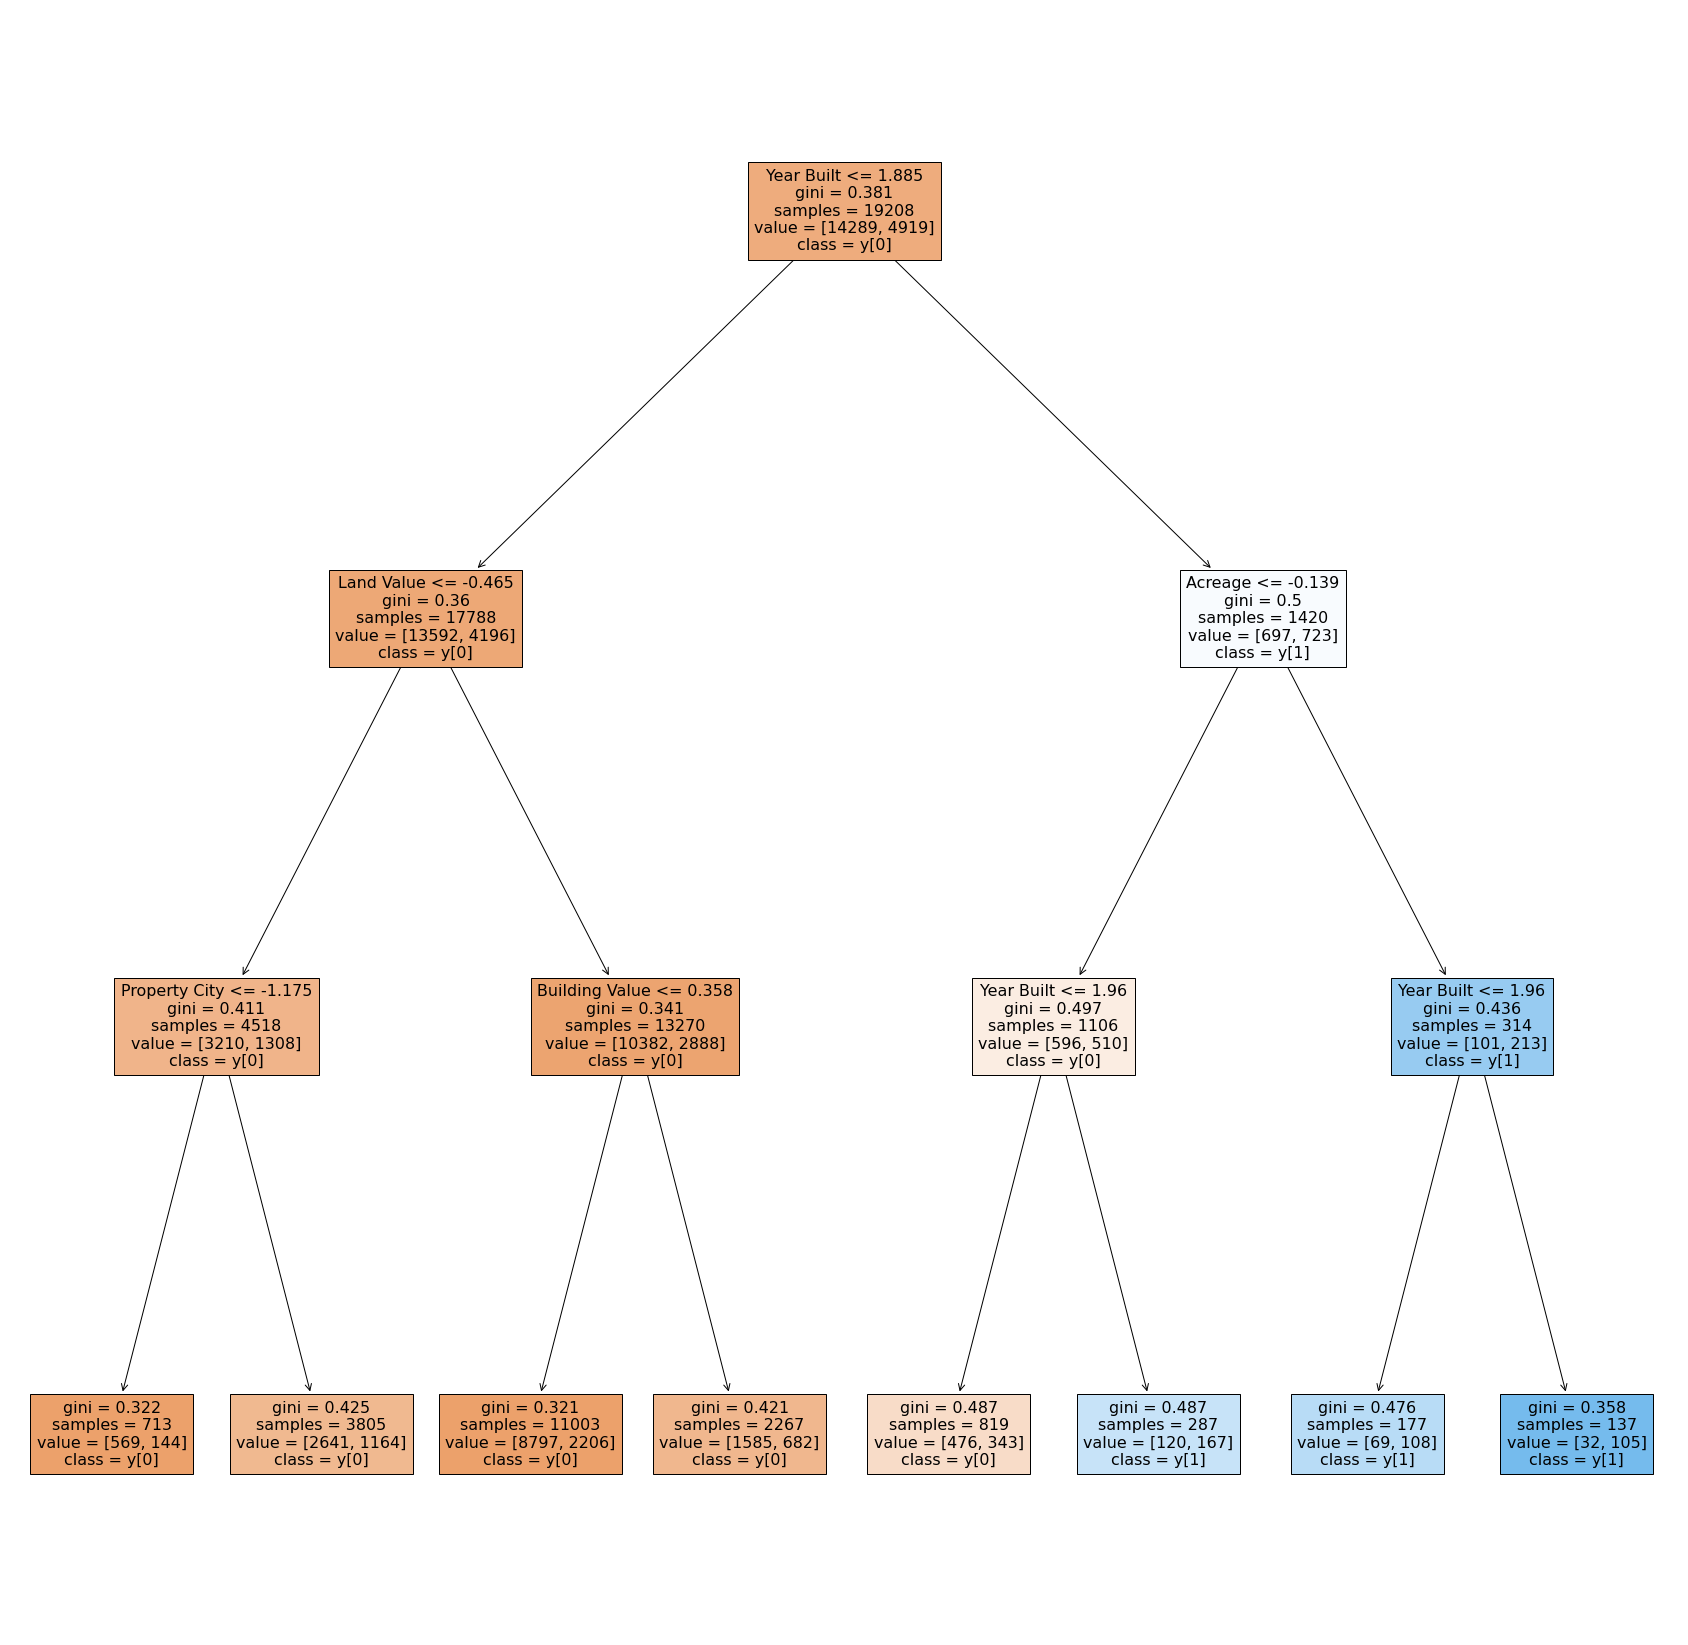

In [646]:
#part 3
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
plt.figure(figsize=(30,30))
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree.plot_tree(clf_gini.fit(x_train, z_train),feature_names = x_train.columns,filled = True,class_names=True)

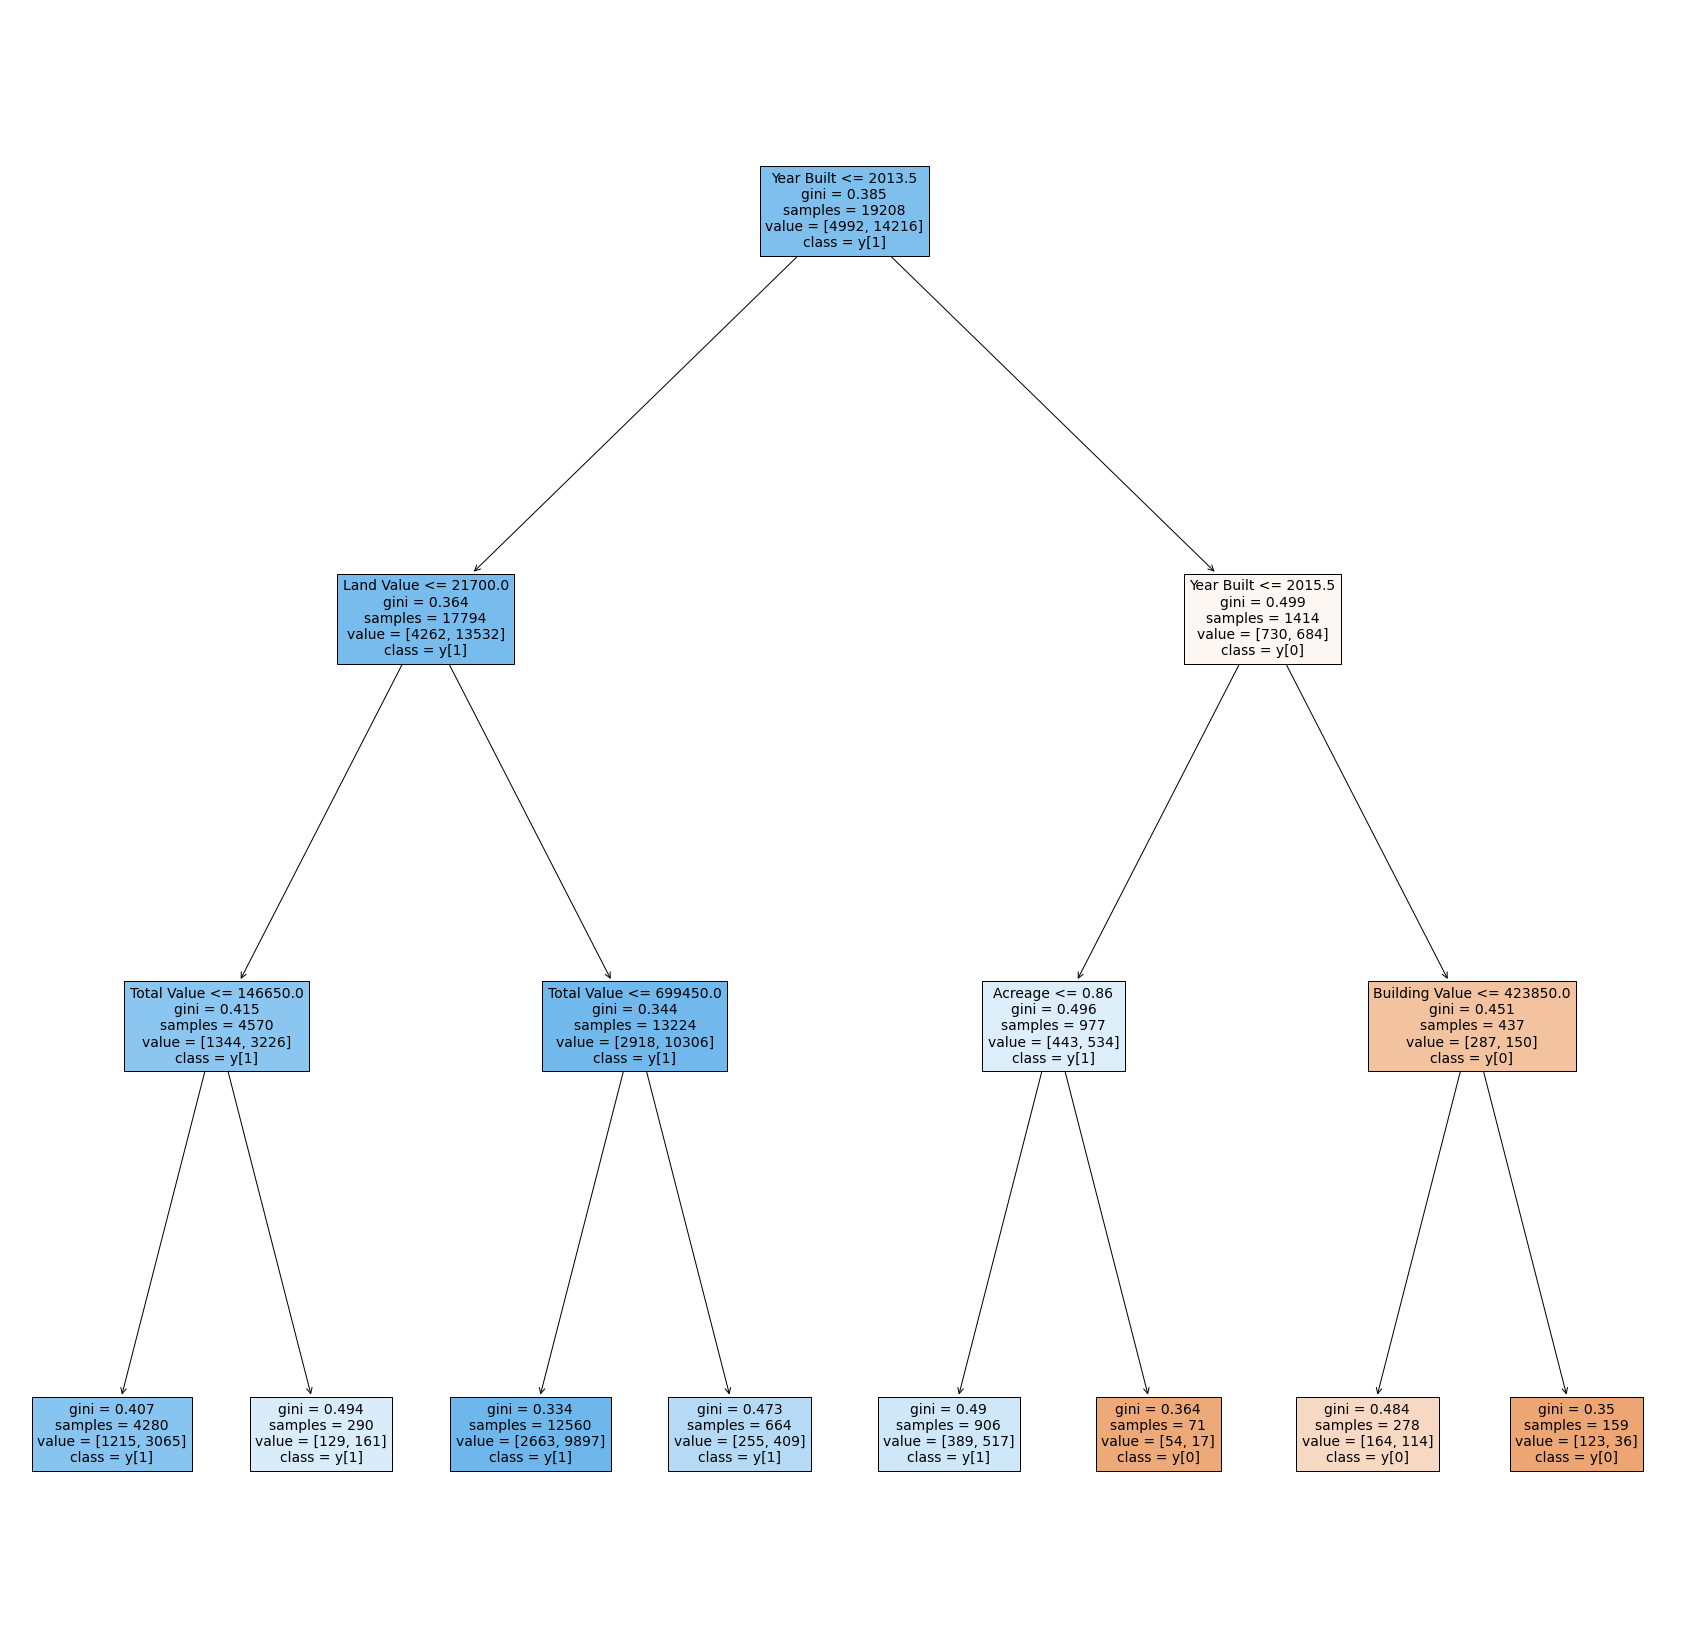

In [649]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
plt.figure(figsize=(30,30))
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)
tree.plot_tree(clf_gini.fit(x_train1, z_train1),feature_names = x_train1.columns,filled = True,class_names=True)
fig.set_size_inches(150, 100)

In [734]:
#Part 4:
model= clf_gini.fit(x_train1, z_train1)
z_predict=model.predict(x_test1)
accuracy_score(z_test1, z_predict)
cnf_matrix = metrics.confusion_matrix(z_test1, z_predict)
cnf_matrix
from sklearn.metrics import mean_squared_error
mean_squared_error(z_test1, z_predict)
model = sm.OLS(z_test1, z_predict).fit()
print(model.aic)

5737.283070373762


In [687]:
accuracy_score(z_test1, z_predict)

0.7466166978971476

In [ ]:
from sklearn.metrics import mean_squared_error
mean_squared_error(x_train1,z_train1)

In [532]:
model1= clf_gini.fit(x_train, z_train)
z_predict1=model.predict(x_test)
accuracy_score(z_test, z_predict1)

0.7455756818655007

In [688]:
mean_squared_error(z_test, z_predict1)

0.2544243181344993

In [740]:

cnf_matrix = metrics.confusion_matrix(z_test, z_predict1)
cnf_matrix
model = sm.OLS(z_test, z_predict1).fit()
print(model.aic)

6956.89876890767


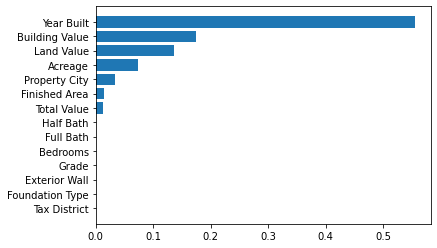

In [502]:
importances = model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

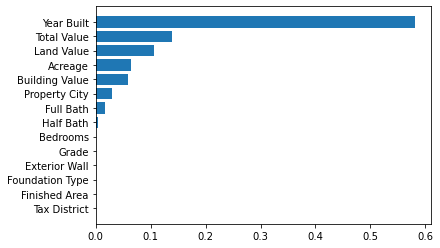

In [507]:
model1= clf_gini.fit(x_train1, z_train1)
importances = model1.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [513]:
# random forest
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(random_state=10000,max_depth=4)
rf_model.fit(x_train,z_train)
zrf_predict = rf_model.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zrf_predict)

C:\Users\leube\AppData\Local\Temp\ipykernel_47828\2461086057.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train,z_train)


0.7416198209452426

In [689]:
rf_model1= RandomForestClassifier(random_state=10000,max_depth=4)
rf_model1.fit(x_train,z_train)
zrf_predict = rf_model1.predict(x_test)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test,zrf_predict)
cnf_matrix = metrics.confusion_matrix(z_test,zrf_predict)
cnf_matrix
mean_squared_error(z_test,zrf_predict)

C:\Users\leube\AppData\Local\Temp\ipykernel_47828\3577017446.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model1.fit(x_train,z_train)


0.25838017905475746

In [601]:
accuracy_score(z_test,zrf_predict)

0.7416198209452426

In [733]:
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test, zrf_predict))
print(classification_report(z_test, zrf_predict))
model = sm.OLS(z_test, zrf_predict).fit()
print(model.aic)

[[3511   28]
 [1213   51]]
              precision    recall  f1-score   support

           0       0.74      0.99      0.85      3539
           1       0.65      0.04      0.08      1264

    accuracy                           0.74      4803
   macro avg       0.69      0.52      0.46      4803
weighted avg       0.72      0.74      0.65      4803

7093.7490289867565


In [732]:
from sklearn.ensemble import RandomForestClassifier
rf_model= RandomForestClassifier(random_state=10000,max_depth=4)
rf_model.fit(x_train1,z_train1)
zrf_predict1 = rf_model.predict(x_test1)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test1,zrf_predict1)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(z_test1, zrf_predict1))
print(classification_report(z_test1, zrf_predict1))
model = sm.OLS(z_test1, zrf_predict1).fit()
print(model.aic)

C:\Users\leube\AppData\Local\Temp\ipykernel_47828\3043299937.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_model.fit(x_train1,z_train1)


[[  48 1187]
 [  23 3545]]
              precision    recall  f1-score   support

           0       0.68      0.04      0.07      1235
           1       0.75      0.99      0.85      3568

    accuracy                           0.75      4803
   macro avg       0.71      0.52      0.46      4803
weighted avg       0.73      0.75      0.65      4803

5654.129255468663


In [690]:
mean_squared_error(z_test1, zrf_predict1)

0.25192587965854674

In [731]:
model = sm.OLS(z_test1, zrf_predict1).fit()
print(model.aic)

5654.129255468663


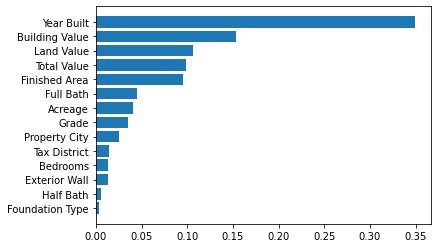

In [655]:
importances = rf_model1.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

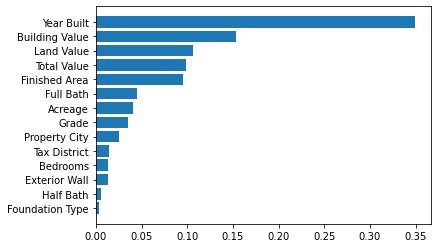

In [654]:
importances = rf_model.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train1.columns)[indices])

In [711]:
# gradient
from sklearn.ensemble import GradientBoostingClassifier
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=100, learning_rate=1)
model121=gbclass.fit(x_train,z_train)
gbypred=gbclass.predict(x_test)
gbclass.score(x_test, z_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7249635644388923

In [715]:
confusion_matrix(z_test, gbypred)

array([[3466,   73],
       [1140,  124]], dtype=int64)

In [730]:
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=100, learning_rate=0.1)
model121=gbclass.fit(x_train,z_train)
gbypred=gbclass.predict(x_test)
gbclass.score(x_test, z_test)#0.747
confusion_matrix(z_test, gbypred)
model = sm.OLS(z_test, gbypred).fit()
print(model.aic)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


6914.380785267841


array([[3466,   73],
       [1140,  124]], dtype=int64)

In [1]:
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=100, learning_rate=0.5)
model121=gbclass.fit(x_train,z_train)
gbypred=gbclass.predict(x_test)
gbclass.score(x_test, z_test) #0.73
confusion_matrix(z_test, gbypred)
model = sm.OLS(z_test1, gbypred1).fit()
print(model.aic)

NameError: name 'GradientBoostingClassifier' is not defined

In [707]:
mean_squared_error(z_test, gbypred)

0.27503643556110763

In [702]:
 gbypred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [724]:
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=100, learning_rate=1)
model123=gbclass.fit(x_train1,z_train1)
gbypred1=gbclass.predict(x_test1)
gbclass.score(x_test1, z_test1) #0.719
confusion_matrix(z_test1, gbypred1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 229, 1006],
       [ 341, 3227]], dtype=int64)

In [ ]:
confusion_matrix(z_test, gbypred)

In [722]:
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=100, learning_rate=0.5)
model123=gbclass.fit(x_train1,z_train1)
gbypred1=gbclass.predict(x_test1)
gbclass.score(x_test1, z_test1)#0.736
confusion_matrix(z_test1, gbypred1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array([[ 177, 1058],
       [ 206, 3362]], dtype=int64)

In [728]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
model = sm.OLS(z_test1, gbypred1).fit()
print(model.aic)

6587.482243102214


In [729]:
gbclass=GradientBoostingClassifier(random_state=0,n_estimators=100, learning_rate=0.1)
model123=gbclass.fit(x_train1,z_train1)
gbypred1=gbclass.predict(x_test1)
gbclass.score(x_test1, z_test1)#0.744
confusion_matrix(z_test1, gbypred1)
model = sm.OLS(z_test1, gbypred1).fit()
print(model.aic)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\ensemble\_gb.py:494: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


5860.175430121484


In [ ]:
confusion_matrix(z_test, gbypred)

In [710]:
mean_squared_error(z_test1, gbypred1)

0.2552571309598168

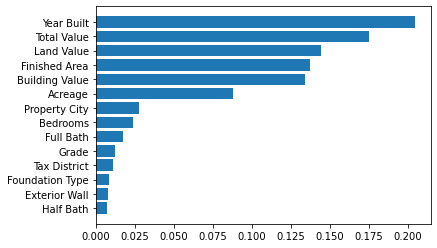

In [657]:
importances = model123.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train1.columns)[indices])

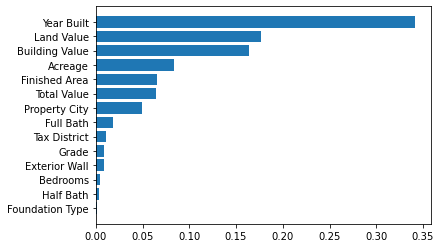

In [592]:
importances = model121.feature_importances_

indices = np.argsort(importances)

fig, ax = plt.subplots()
ax.barh(range(len(importances)), importances[indices])
ax.set_yticks(range(len(importances)))
_ = ax.set_yticklabels(np.array(x_train.columns)[indices])

In [611]:
#neural network
from sklearn.preprocessing import StandardScaler
sc= StandardScaler()
X_train_array= sc.fit_transform(x_train.values)
x_train= pd.DataFrame(X_train_array, index=x_train.index, columns=x_train.columns)
X_test_array= sc.fit_transform(x_test.values)
x_test= pd.DataFrame(X_test_array, index=x_test.index, columns=x_test.columns)

In [673]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier( solver='sgd',learning_rate_init=0.1,max_iter=10000,activation='logistic')
mlp.fit(x_train, z_train)
mlp.score(x_test,z_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7370393504059962

In [675]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(3, solver='sgd',learning_rate_init=1,max_iter=10000,activation='tanh')
mlp.fit(x_train, z_train)
mlp.score(x_test,z_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7368311471996669

In [677]:
from sklearn.neural_network import MLPClassifier
hidden_layer_sizes=(100,100,1)
mlp= MLPClassifier(3, solver='sgd',learning_rate_init=1,max_iter=10000,activation='relu')
mlp.fit(x_train, z_train)
mlp.score(x_test,z_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.6843639392046638

In [678]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier( solver='sgd',learning_rate_init=0.01,max_iter=15000,activation='logistic')
mlp.fit(x_train1, z_train1)
mlp.score(x_test1,z_test1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7428690401832189

In [680]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier(3, solver='sgd',learning_rate_init=1,max_iter=15000,activation='tanh')
mlp.fit(x_train1, z_train1)
mlp.score(x_test1,z_test1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.2571309598167812

In [681]:
from sklearn.neural_network import MLPClassifier
mlp= MLPClassifier( solver='sgd',learning_rate_init=0.01,max_iter=15000,activation='relu')
mlp.fit(x_train1, z_train1)
mlp.score(x_test1,z_test1)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1109: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.7426608369768894

In [ ]:
rf_model= RandomForestClassifier(random_state=10000,max_depth=4)
rf_model.fit(x_train1,z_train1)
zrf_predict1 = rf_model.predict(x_test1)
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
accuracy_score(z_test1,zrf_predict1)

ValueError: y_true and y_pred have different number of output (14!=1)